Užduotis 1
1.1. Viename grafike pavaizduoti naujų COVID atvejų Lietuvoje dinamiką laike (incidence time series) tokiose
amžiaus grupėse: 0-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90+. Vaizdavimui naudoti slenkančius vidurkius
(konkrečiai dienai priskirti keturiolikos paskutinių dienų rodiklio vidurkį). Laiko ašyje rodyti lietuviškus mėnesių
pavadinimus. Pateikti legendą (informacinę dėžutę) paaiškinančią grupių spalvas/pavadinimus.


In [27]:
import pandas as pd
covid = pd.read_csv('Agreguoti_COVID19_atvejai_ir_mirtys.csv')
covid.head()

,municipality_name,date,sex,age_gr,incidence,infection_1,infection_2,infection_3,infection_4,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3,object_id
0,Marijampolės sav.,2/1/2020 12:00:00 AM,Moteris,100-109,0,0,0,0,0,1,0,0,0,1
1,Alytaus m. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,0,0,0,0,1,0,0,0,2
2,Tauragės r. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,0,0,0,0,1,0,0,0,3
3,Kalvarijos sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,0,0,0,0,1,0,0,0,4
4,Kelmės r. sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,0,0,0,0,1,0,0,0,5


In [28]:
covid.drop(columns=['infection_1', 'infection_2', 'infection_3', 'infection_4', 'deaths_cov1', 'deaths_cov2', 'deaths_cov3'], inplace=True)
covid.head()

,municipality_name,date,sex,age_gr,incidence,deaths_all,object_id
0,Marijampolės sav.,2/1/2020 12:00:00 AM,Moteris,100-109,0,1,1
1,Alytaus m. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,1,2
2,Tauragės r. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,1,3
3,Kalvarijos sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,1,4
4,Kelmės r. sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,1,5


In [29]:
covid['date'] = pd.to_datetime(covid['date'])
# covid.head()
# Change min and max age to one age group
def merge_age_groups(age):
    if age in ['0-9', '10-19', '20-29']:
        return '0-29'
    if age in ['90-99', '100-109', '110-119']:
        return '90+'
    else:
        return age

covid['age_gr'] = covid['age_gr'].apply(merge_age_groups)

grouped=covid.groupby(['date', 'age_gr']).sum('incidence')
grouped.drop(columns=['object_id', 'deaths_all'], inplace=True)
grouped.head()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_6724\1922625632.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid['date'] = pd.to_datetime(covid['date'])


incidence
date       age_gr           
2020-02-01 0-29            0
           30-39           0
           40-49           0
           50-59           0
           60-69           0

In [30]:
pivoted = grouped.reset_index().pivot(index='date', columns='age_gr', values='incidence').fillna(0)
pivoted.drop(columns=['Nenustatyta'], inplace=True)
rolling = pivoted.rolling(window=14).mean()
january = rolling.loc['2021-01']
january.head()

age_gr,0-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
date,,,,,,,,
2021-01-01,341.928571,412.785714,421.428571,508.428571,508.928571,195.285714,115.357143,57.071429
2021-01-02,329.000000,397.857143,405.928571,483.357143,483.857143,187.000000,113.428571,54.357143
2021-01-03,324.071429,390.000000,398.071429,476.071429,477.642857,183.500000,110.642857,54.285714
2021-01-04,324.000000,385.571429,392.071429,471.857143,470.357143,184.928571,111.285714,56.285714
2021-01-05,316.214286,376.642857,375.785714,455.714286,452.571429,180.500000,107.714286,54.071429


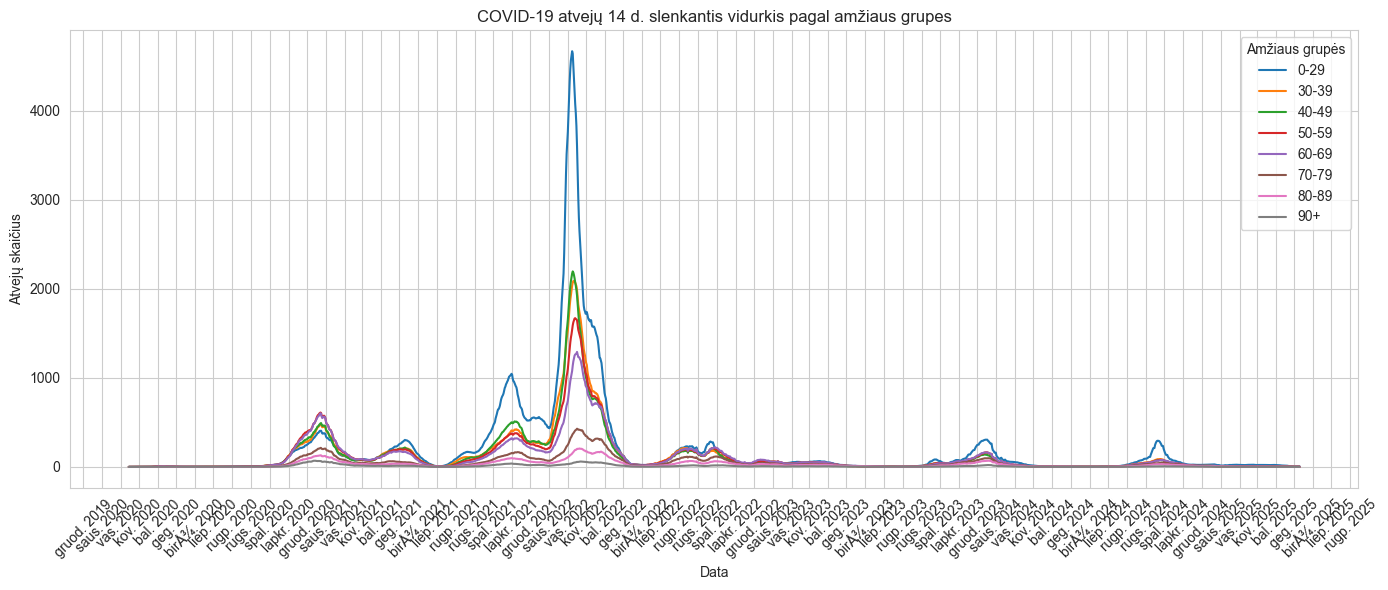

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import locale

# Try to set Lithuanian locale
try:
    locale.setlocale(locale.LC_TIME, 'lt_LT.UTF-8')
except locale.Error:
    locale.setlocale(locale.LC_TIME, '')

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for col in rolling.columns:
    plt.plot(rolling.index, rolling[col], label=col)

plt.title('COVID-19 atvejų 14 d. slenkantis vidurkis pagal amžiaus grupes')
plt.xlabel('Data')
plt.ylabel('Atvejų skaičius')
plt.legend(title='Amžiaus grupės')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1.2. Toks pats grafikas kaip 1.1, tačiau rodiklį normalizuokite grupės dydžiui, laikydami, kad visų grupių dydis
vienodas (pvz., 200000 arba 100%). Amžiaus grupių populiacijų dydžius rasite čia:
https://osp.stat.gov.lt/ ➝ Visi rodikliai ➝ Rodiklių duomenų bazė ➝ …

In [32]:
# Load sheet 2 (sheet index starts at 0)
pop_df = pd.read_excel('amziaus_grupes.xlsx', sheet_name=1)
pop_df.head(8)

,Age_group,Population
0,0-29,859002
1,30-39,382619
2,40-49,374566
3,50-59,424640
4,60-69,369020
5,70-79,242075
6,80-89,208732
7,90+,22755


In [33]:
#how many new cases per 100000 people of this age group
equal_pop = 100000  

# Make a copy to avoid modifying original
normalized = rolling.copy()

# Normalize each age group as if all had equal population

for group in normalized.columns:
    actual_pop = pop_df.loc[pop_df['Age_group'] == group, 'Population']
    normalized[group] = (normalized[group] / actual_pop.values[0]) * equal_pop

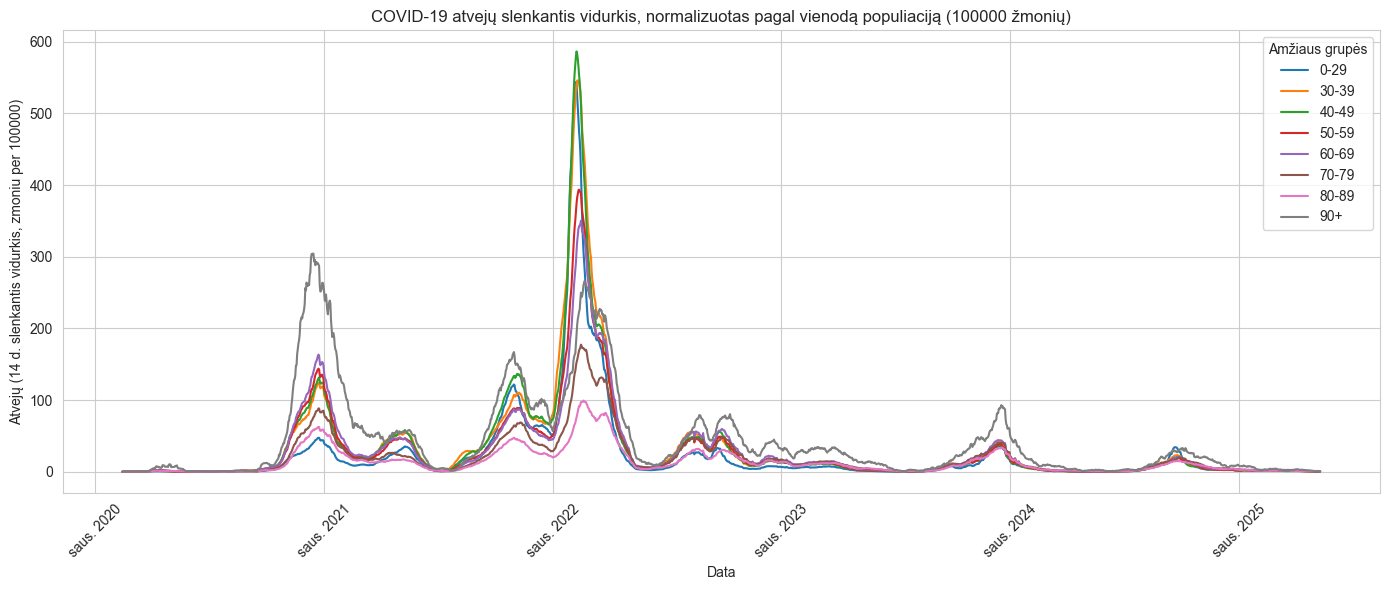

In [34]:
# Plotting
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for column in normalized.columns:
    plt.plot(normalized.index, normalized[column], label=column)

plt.title('COVID-19 atvejų slenkantis vidurkis, normalizuotas pagal vienodą populiaciją (100000 žmonių)')
plt.xlabel('Data')
plt.ylabel('Atvejų (14 d. slenkantis vidurkis, zmoniu per 100000)')
plt.legend(title='Amžiaus grupės')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

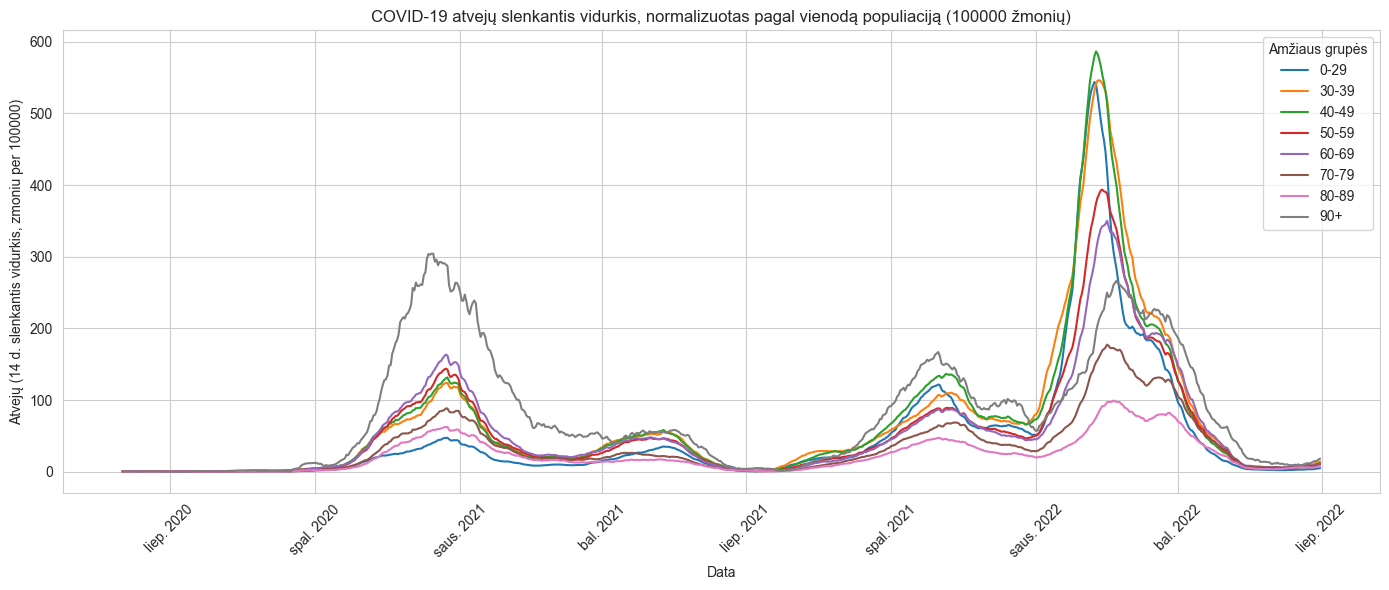

In [35]:
# Filter the data for the specified date range
filtered = normalized.loc['2020-06-01':'2022-06-30']
# Plotting
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for column in filtered.columns:
    plt.plot(filtered.index, filtered[column], label=column)

plt.title('COVID-19 atvejų slenkantis vidurkis, normalizuotas pagal vienodą populiaciją (100000 žmonių)')
plt.xlabel('Data')
plt.ylabel('Atvejų (14 d. slenkantis vidurkis, zmoniu per 100000)')
plt.legend(title='Amžiaus grupės')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chart3.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

Užduotis 2
2.1. Identifikuokite pandemijos 60 dienų intervalą,
kurio metu bendras mirtingumas (duomenų stulpelis
all_deaths) Lietuvoje buvo pats didžiausias. Padarykite
tai ne “iš akies”, o naudodamiesi objektyviu savo
sugalvotu optimizavimo algoritmu, surandančiu tokį
intervalą duomenyse.

In [36]:
daily_deaths = covid.groupby('date')['deaths_all'].sum()
daily_deaths.head()

date
2020-02-01     92
2020-02-02    102
2020-02-03    103
2020-02-04    116
2020-02-05    114
Name: deaths_all, dtype: int64

In [37]:
rolling_deaths = daily_deaths.rolling(window=60).sum()
# rolling_deaths.head()
end_day = rolling_deaths.idxmax()  # 60days interval endday where max deaths occured
print(end_day)
max_sum = rolling_deaths.max()
print(max_sum)
start_day = end_day - pd.Timedelta(days=59)
print(start_day)
print(f'Didžiausias bendras mirtingumas ({int(max_sum)} mirčių) buvo nuo {start_day.date()} iki {end_day.date()}')

2021-01-18 00:00:00
10615.0
2020-11-20 00:00:00
Didžiausias bendras mirtingumas (10615 mirčių) buvo nuo 2020-11-20 iki 2021-01-18


2.2. Vizualizuokite Lietuvos savivaldybes pagal jų
bendro mirtingumo rangą padieniui 2.1 punkte surasto
laiko intervalo eigoje. Mirtingumas turi būti
normalizuotas savivaldybės gyventojų skaičiui (pvz.,
tenkantis 100,000 gyventojų). Dešimt didžiausių
savivaldybių nuspalvinkite gradiento spalva (kad
spalva/tonas intuityviai indikuotų dydį). Pateikiame
panašų pavyzdį iš kitur (dešinėje).

In [38]:
start_date='2020-11-20'
end_date='2021-01-18'
interval_df = covid[(covid['date'] >= start_date) & (covid['date'] <= end_date)]
deaths_by_muni = interval_df.groupby('municipality_name')['deaths_all'].sum().reset_index()
deaths_by_muni.tail()

,municipality_name,deaths_all
56,Šiaulių r. sav.,149
57,Šilalės r. sav.,112
58,Šilutės r. sav.,163
59,Širvintų r. sav.,59
60,Švenčionių r. sav.,101


In [ ]:
pop_df = pd.read_excel('population_2021.xlsx', sheet_name=0)
# pop_df=pop_df.drop('Nenurodyta', axis=1)
pop_df = pop_df[pop_df['municipality_name'].str.contains('sav.', na=False)]
pop_sav = pop_df[['municipality_name', 'population']] # only 2 colums from the original
pop_sav.head()
# population_df.head()
merged = pd.merge(deaths_by_muni, pop_sav, on='municipality_name', how='inner')
# merged.head()
merged['deaths_per_100k'] = merged['deaths_all'] / merged['population'] * 100000
merged= merged.sort_values('deaths_per_100k', ascending=True)

top10 = merged.nlargest(10, 'deaths_per_100k').sort_values('deaths_per_100k', ascending=True)
top10_names = top10['municipality_name'].tolist()
top10.head(10)


,municipality_name,deaths_all,population,deaths_per_100k
46,Varėnos r. sav.,109,21137.0,515.683399
12,Kaišiadorių r. sav.,155,29835.0,519.524049
29,Pakruojo r. sav.,98,18827.0,520.529027
5,Biržų r. sav.,123,23314.0,527.579995
23,Lazdijų r. sav.,97,18247.0,531.594235
35,Prienų r. sav.,135,25286.0,533.892272
39,Rokiškio r. sav.,161,28715.0,560.682570
3,Anykščių r. sav.,142,23321.0,608.893272
0,Akmenės r. sav.,128,19585.0,653.561399
2,Alytaus r. sav.,183,25581.0,715.374692


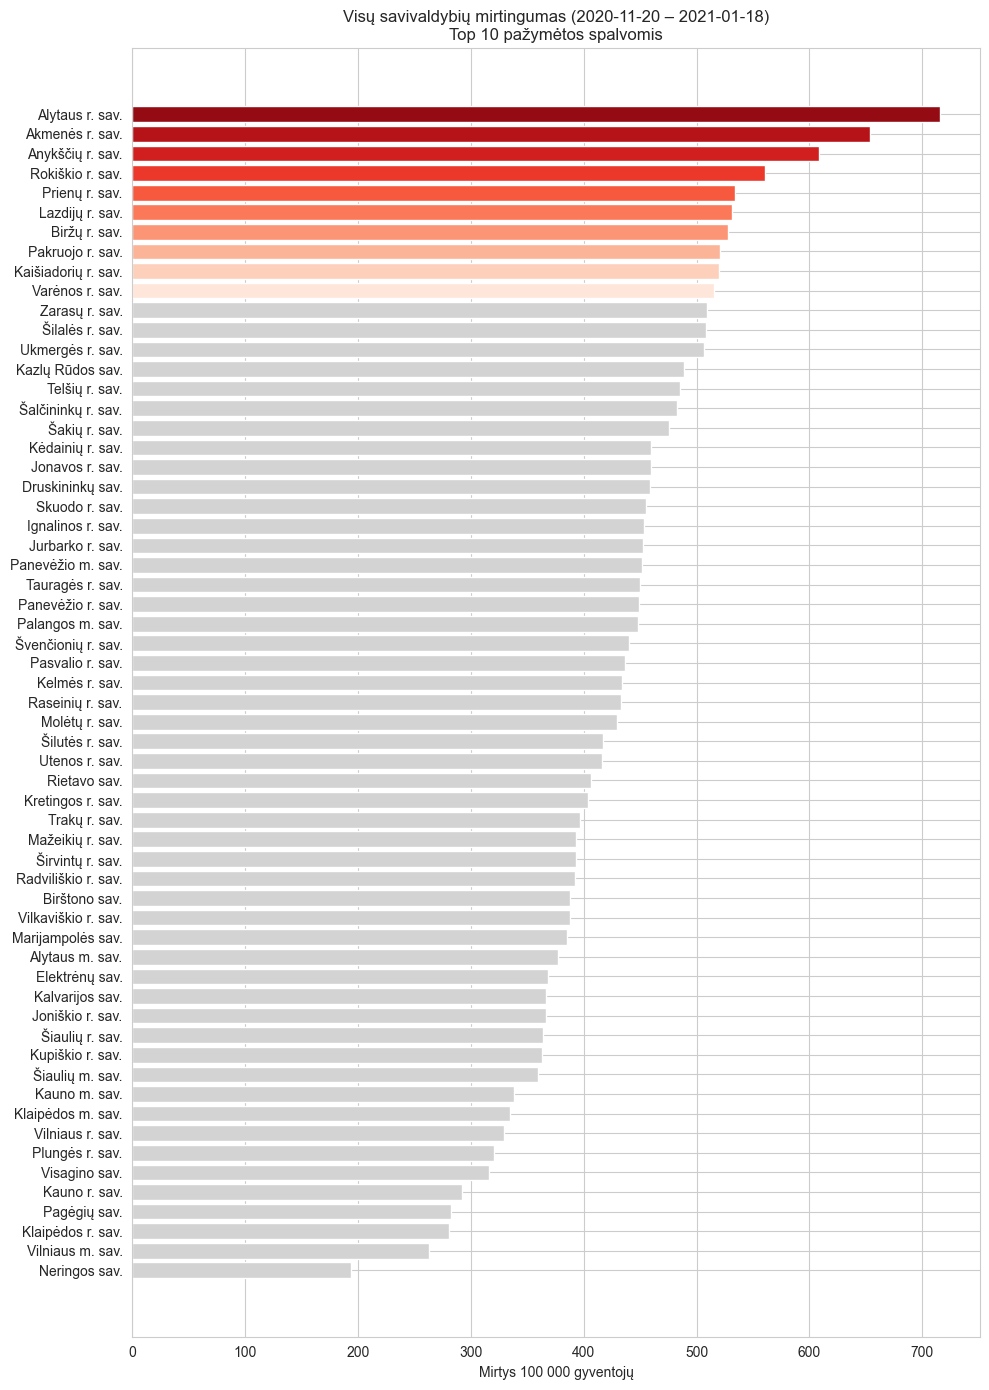

In [40]:
#plotting
colors = []
gradient = sns.color_palette("Reds", n_colors=10)

for name in merged['municipality_name']:
    if name in top10_names:
        # Use gradient color based on rank in top10
        index_in_top10 = top10_names.index(name)
        colors.append(gradient[index_in_top10])
    else:
        colors.append('lightgrey')  # Neutral color for other municipalities


plt.figure(figsize=(10, 14))  # Taller plot for many entries
bars = plt.barh(merged['municipality_name'], merged['deaths_per_100k'], color=colors)

plt.xlabel('Mirtys 100 000 gyventojų')
plt.title('Visų savivaldybių mirtingumas (2020-11-20 – 2021-01-18)\nTop 10 pažymėtos spalvomis')
plt.tight_layout()
plt.savefig('chart4.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

2.3. Tas pats, kaip 2.2, tačiau savivaldybes
padarykite maksimaliai demografiškai palyginamomis,
t.y., mirtingumo rodiklį normalizuoti ne tik gyventojų
skaičiui savivaldybėse, tačiau ir gyventojų skaičiui
visose amžiaus grupėse tose savivaldybėse. 